# Exploration Data Analysis (EDA) - Bank Full

Sumber Dataset : https://drive.google.com/file/d/1dh1UrODNB4oWbap0J4WOWJJjkP217T7e/view?usp=sharing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

## Features Descriptions

**Bank Client Data :**

1. age : age of the lead (numeric)
2. job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
3. marital : marital status (categorical: "married","divorced","single"; **note: "divorced" means divorced or widowed**)
4. education : educational qualification (categorical: "unknown","secondary","primary","tertiary")
5. default : has credit in default? (binary: "yes","no")
6. balance : average yearly balance, in euros (numeric) 
7. housing : has housing loan? (binary: "yes","no")
8. loan : has personal loan? (binary: "yes","no")

**Related with the last contact of the current campaign:**

9. contact : contact communication type (categorical: "unknown","telephone","cellular") 
10. day : last contact day of the month (numeric)
11. month : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration : last contact duration, in seconds (numeric)

**Other attributes:**

13. campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous : number of contacts performed before this campaign and for this client (numeric)
16. poutcome : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: "yes","no")

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings 
warnings.filterwarnings("ignore")

## Overview

In [2]:
# Load data
df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
# display top 5 the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# display bottom 5 the data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 17)

In [6]:
# view info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# checking number of null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# checking missing values
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [9]:
# display number of missing values
df.isnull().sum().sum()

0

In [10]:
# looking the distribution of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
# looking the distribution of categorical data
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [12]:
data = []
for i in df.columns:
    data.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values])

data1 = pd.DataFrame(data,columns=["Columns", "Null Values", "Unique Number", "Values"])
data1

,Columns,Null Values,Unique Number,Values
0,age,0,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5..."
1,job,0,12,"[management, technician, entrepreneur, blue-co..."
2,marital,0,3,"[married, single, divorced]"
3,education,0,4,"[tertiary, secondary, unknown, primary]"
4,default,0,2,"[no, yes]"
5,balance,0,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
6,housing,0,2,"[yes, no]"
7,loan,0,2,"[no, yes]"
8,contact,0,3,"[unknown, cellular, telephone]"
9,day,0,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


There are some features that have unknown values, maybe this value is a null value, but in this exploration the unknown value is left.

## Data Preprocessing

In [13]:
df_cat = df.select_dtypes("object")
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [14]:
df_con = df.select_dtypes("int64")
df_con

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [15]:
df_cat = df_cat.replace({"yes":1, "no":0})
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,0,1,0,unknown,may,unknown,0
1,technician,single,secondary,0,1,0,unknown,may,unknown,0
2,entrepreneur,married,secondary,0,1,1,unknown,may,unknown,0
3,blue-collar,married,unknown,0,1,0,unknown,may,unknown,0
4,unknown,single,unknown,0,0,0,unknown,may,unknown,0
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,0,0,0,cellular,nov,unknown,1
45207,retired,divorced,primary,0,0,0,cellular,nov,unknown,1
45208,retired,married,secondary,0,0,0,cellular,nov,success,1
45209,blue-collar,married,secondary,0,0,0,telephone,nov,unknown,0


In [16]:
df1 = pd.concat([df_cat, df_con], axis=1)
df1

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,0,1,0,unknown,may,unknown,0,58,2143,5,261,1,-1,0
1,technician,single,secondary,0,1,0,unknown,may,unknown,0,44,29,5,151,1,-1,0
2,entrepreneur,married,secondary,0,1,1,unknown,may,unknown,0,33,2,5,76,1,-1,0
3,blue-collar,married,unknown,0,1,0,unknown,may,unknown,0,47,1506,5,92,1,-1,0
4,unknown,single,unknown,0,0,0,unknown,may,unknown,0,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,0,0,0,cellular,nov,unknown,1,51,825,17,977,3,-1,0
45207,retired,divorced,primary,0,0,0,cellular,nov,unknown,1,71,1729,17,456,2,-1,0
45208,retired,married,secondary,0,0,0,cellular,nov,success,1,72,5715,17,1127,5,184,3
45209,blue-collar,married,secondary,0,0,0,telephone,nov,unknown,0,57,668,17,508,4,-1,0


## Data Visualization

### Target Features

,y
0,39922
1,5289


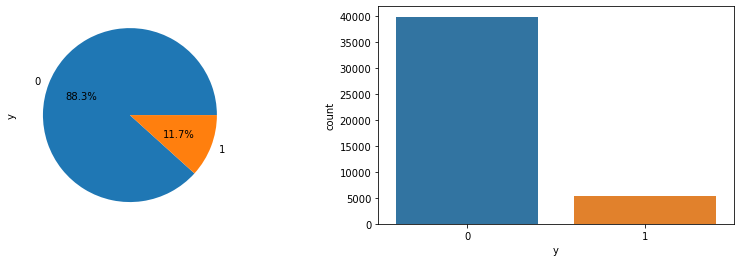

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df1.y.value_counts().plot(kind='pie',autopct='%.1f%%')  
plt.subplot(1,2,2)
sns.countplot(df1.y)
x = pd.DataFrame(df1.y.value_counts())
x

Based on the graph, we know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%.

### Numerical Features

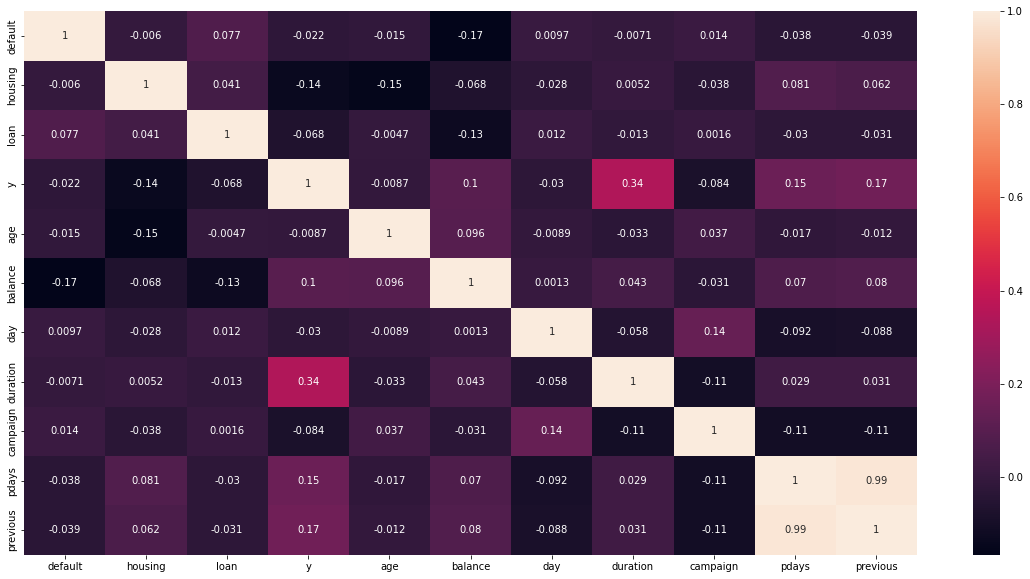

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr("spearman"), annot = True)
plt.show()

**Checking Correlation**
- If we look at the correlation between y and other features, there are 7 features that have a relationship with y. Duration feature has a weak correlation value with connection to y, but if we compared to other features, duration is the feature that has the highest correlation with y.
- In general, pdays with previous has a very strong connection because it has a correlation value of 0.99 or almost close to 1

<AxesSubplot:xlabel='y', ylabel='previous'>

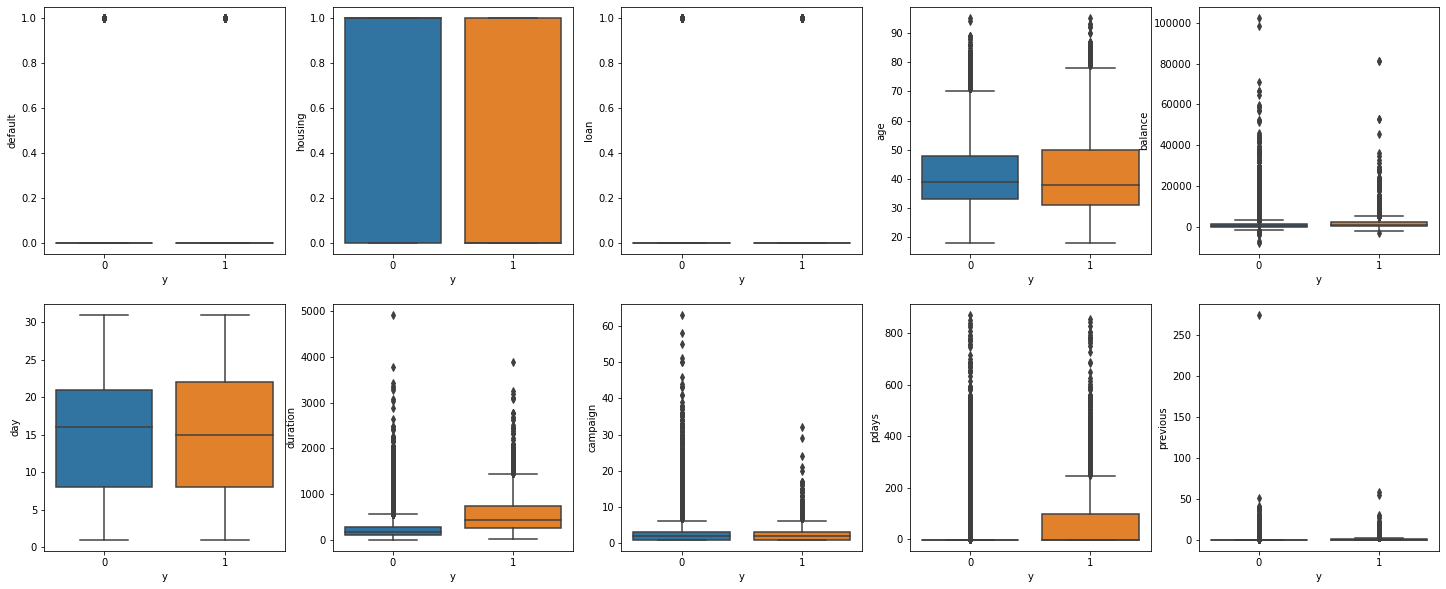

In [85]:
fig, axes=plt.subplots(2,5,figsize=(25,10))
sns.boxplot(data=df1, x="y", y="default", ax=axes[0,0])
sns.boxplot(data=df1, x="y", y="housing", ax=axes[0,1])
sns.boxplot(data=df1, x="y", y="loan", ax=axes[0,2])
sns.boxplot(data=df1, x="y", y="age", ax=axes[0,3])
sns.boxplot(data=df1, x="y", y="balance", ax=axes[0,4])
sns.boxplot(data=df1, x="y", y="day", ax=axes[1,0])
sns.boxplot(data=df1, x="y", y="duration", ax=axes[1,1])
sns.boxplot(data=df1, x="y", y="campaign", ax=axes[1,2])
sns.boxplot(data=df1, x="y", y="pdays", ax=axes[1,3])
sns.boxplot(data=df1, x="y", y="previous", ax=axes[1,4])

**Based on the illustration obtained information that:**
- Balance, duration and pdays may have an influence on the number of clients who subscribe
- In balance, we know that The bigger of balance, the greater of chance for the client to subscribe
- As with the duration, it can be seen that the longer the duration of the last contact, the more likely the client to subscribe
- And the longer the number of days that passed by after the client was last contacted from a previous campaign, the greater the chances of the client to subscribe

### Categorical Features

**JOB FEATURES**

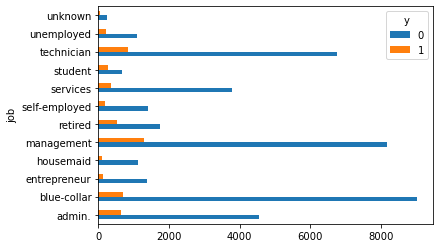

y,0,1,ratio
job,,,
blue-collar,9024,708,0.078457
entrepreneur,1364,123,0.090176
housemaid,1131,109,0.096375
services,3785,369,0.097490
technician,6757,840,0.124316
unknown,254,34,0.133858
self-employed,1392,187,0.134339
admin.,4540,631,0.138987
management,8157,1301,0.159495


In [120]:
pd.crosstab(df1.job,df1.y).plot(kind='barh')
plt.show()

new = pd.crosstab(df1.job,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who work as management as many as 1301 and a percentage rate of 15.94% and the clients who subscribe the least are clients who work as house maids as many as 109 and a percentage rate of 9.63%

**MARITAL FEATURES**

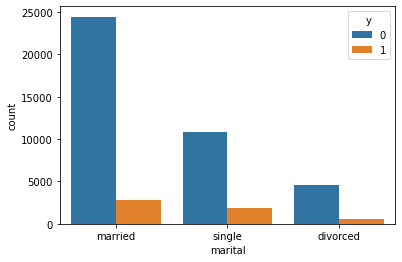

y,0,1,ratio
marital,,,
married,24459,2755,0.112637
divorced,4585,622,0.135660
single,10878,1912,0.175768


In [129]:
sns.countplot(x="marital", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.marital,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with married status as much as 2755 and a percentage rate of 11.26% and clients who subscribe the least, namely clients with divorced status as much as 622 and a percentage rate of 13.56%

**EDUCATION FEATURES**

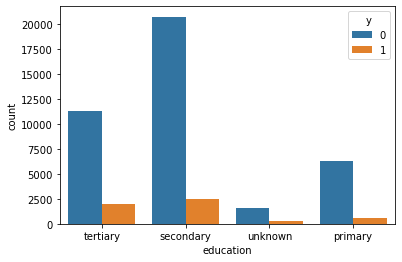

y,0,1,ratio
education,,,
primary,6260,591,0.094409
secondary,20752,2450,0.118061
unknown,1605,252,0.157009
tertiary,11305,1996,0.176559


In [130]:
sns.countplot(x="education", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.education,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with secondary education qualifications as much as 2450 and a percentage rate of 11.80% and clients who subscribe the least, namely clients with primary education qualifications as many as 591 and a percentage rate of 9.44%

**DEFAULT FEATURES**

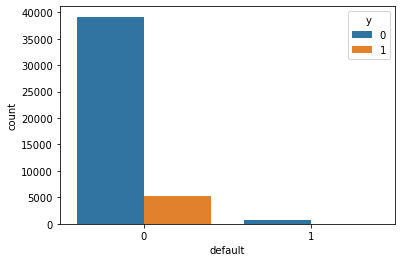

y,0,1,ratio
default,,,
1,763,52,0.068152
0,39159,5237,0.133737


In [131]:
sns.countplot(x="default", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.default,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The majority of clients who subscribe the most are clients who haven't a credit in default as many as 5237 and a percentage rate of 13.37%

**HOUSING FEATURES**

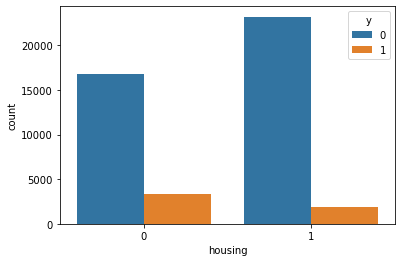

y,0,1,ratio
housing,,,
1,23195,1935,0.083423
0,16727,3354,0.200514


In [132]:
sns.countplot(x="housing", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.housing,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who do not own a house as many as 3354 and a percentage rate of 20.05%

**LOAN FEATURES**

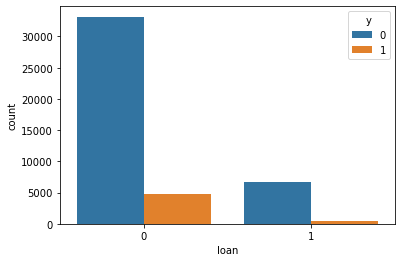

y,0,1,ratio
loan,,,
1,6760,484,0.071598
0,33162,4805,0.144895


In [133]:
sns.countplot(x="loan", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.loan,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who do not have personal loans as many as 4805 clients and a percentage rate of 14.48%

**CONTACT FEATURES**

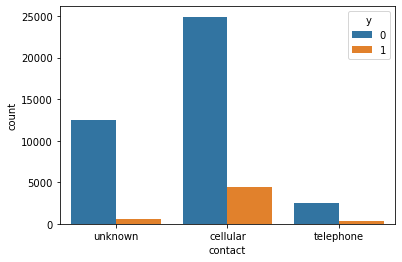

y,0,1,ratio
contact,,,
unknown,12490,530,0.042434
telephone,2516,390,0.155008
cellular,24916,4369,0.175349


In [134]:
sns.countplot(x="contact", hue= "y", data = df1)
plt.show()

new = pd.crosstab(df1.contact,df1.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with cellular contact communication contact types as many as 4369 clients and a percentage rate of 17.53%

## Summary

After analyzing exploratory data on bank data, the following conclusions are obtained:
- We know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%. Then it can be said that credit marketing has not been completely successful because when compared to customers who subscribe and do not subscribe, the comparison is so far.
- Based on numerical features with respect to y, the results obtained that numerical features have a weak relationship with y.
- Numeric features that affect y are **balance, duration, and days**.
- If you look at the distribution of the graphs on the category features, which can be said to have an influence on y are **default, job, loan, and marital.**